In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
fifa = pd.read_csv('/content/drive/MyDrive/Python-Demo/Project/players_22.csv')

<ipython-input-4-9f2738fc4b92>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('/content/drive/MyDrive/Python-Demo/Project/players_22.csv')


In [ ]:
# Filtering the DataFrame to include only the top 20 players based on overall rating
top_20 = fifa.nlargest(20, 'overall')

# Extracting the player_positions column from the filtered DataFrame
positions = top_20['player_positions']

# Spliting the positions for each player
all_positions = [pos.split(', ') for pos in positions]

# Creating a list of all the positions that the top 20 players can play
positions_list = [pos for sublist in all_positions for pos in sublist]

# Counting the number of occurrences of each position in the list
positions_count = Counter(positions_list)

# Sorting the positions based on their frequency count
sorted_positions = sorted(positions_count.items(), key=lambda x: x[1], reverse=True)

print(sorted_positions)

[('ST', 6), ('LW', 5), ('GK', 5), ('CF', 3), ('CDM', 3), ('RW', 2), ('CAM', 2), ('CM', 2), ('LM', 1), ('CB', 1), ('RB', 1)]


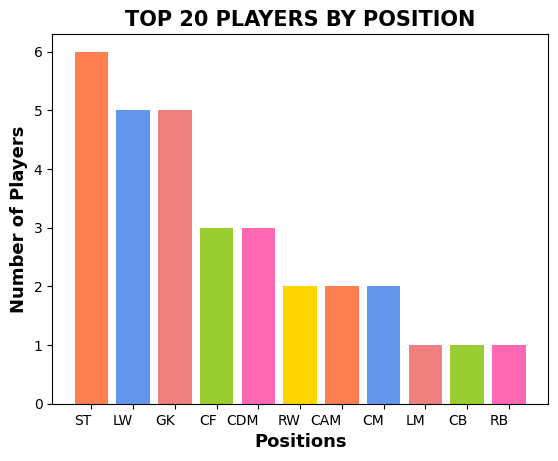

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Filter the DataFrame to include only the top 20 players based on overall rating
top_20 = fifa.nlargest(20, 'overall')

# Extract the player_positions column from the filtered DataFrame
positions = top_20['player_positions']

# Split the positions for each player
all_positions = [pos.split(', ') for pos in positions]

# Create a list of all the positions that the top 20 players can play
positions_list = [pos for sublist in all_positions for pos in sublist]

# Count the number of occurrences of each position in the list
positions_count = Counter(positions_list)

# Sort the positions based on their frequency count
sorted_positions = sorted(positions_count.items(), key=lambda x: x[1], reverse=True)

# Define colors for each position
colors = ['#FF7F50', '#6495ED', '#F08080', '#9ACD32', '#FF69B4', '#FFD700']

# Create a bar plot with different colors for each bar
fig, ax = plt.subplots()
ax.bar(range(len(sorted_positions)), [val[1] for val in sorted_positions], color=colors)

# Set xticks and xticklabels
ax.set_xticks(range(len(sorted_positions)))
ax.set_xticklabels([val[0] for val in sorted_positions], ha='right')

# Set axis labels and title
ax.set_xlabel('Positions', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Players', fontsize=13, fontweight='bold')
ax.set_title('TOP 20 PLAYERS BY POSITION', fontsize=15, fontweight='bold')

# Display the chart
plt.show()

<ipython-input-7-f6414480a6c5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


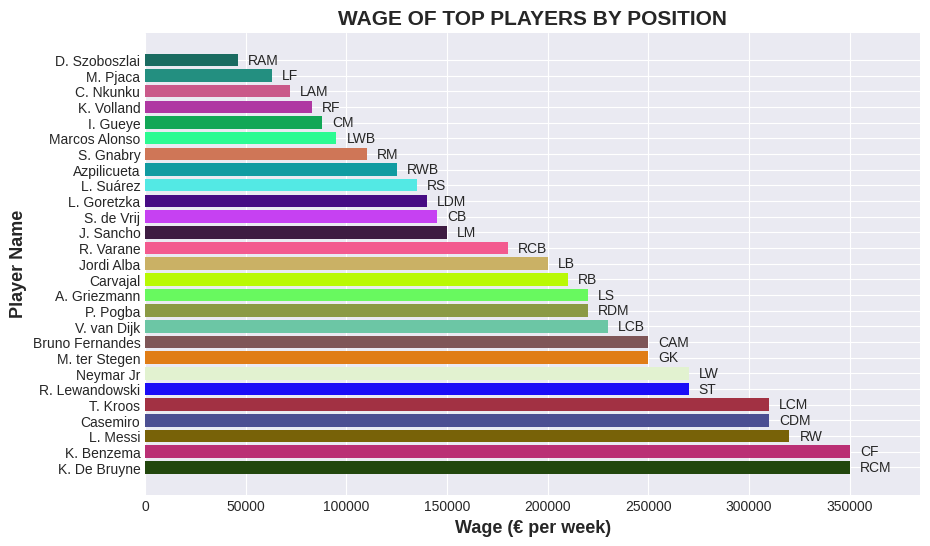

In [ ]:
# Set the seaborn-darkgrid theme
plt.style.use('seaborn-darkgrid')

# Get unique positions excluding 'SUB', 'RES', and NaN
positions = fifa[~fifa['club_position'].isin(['SUB', 'RES', np.nan])]['club_position'].unique()

# Initialize an empty dictionary to store the highest wage for each position
top_wages_by_position = {}

# Initialize empty lists to store the player names and wages
player_names = []
wages = []

# Loop through each position
for position in positions:
    # Get the subset of data for players in the current position
    subset = fifa[fifa['club_position'] == position]
    # Find the player with the highest wage in the subset
    top_player = subset.loc[subset['wage_eur'].idxmax(), ['short_name', 'wage_eur']]
    # Add the position, player name, and wage to the dictionary and lists
    top_wages_by_position[position] = top_player['wage_eur']
    player_names.append(top_player['short_name'])
    wages.append(top_player['wage_eur'])

# Sort the player names and wages by wage in descending order
sorted_indices = sorted(range(len(wages)), key=lambda i: wages[i], reverse=True)
player_names = [player_names[i] for i in sorted_indices]
wages = [wages[i] for i in sorted_indices]
positions = [positions[i] for i in sorted_indices]

# Define a list of random colors
colors = np.random.rand(len(positions), 3)

# Create a horizontal bar plot of the top wages by position
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(positions, wages, color=colors)

ax.margins(x=0.10)

# Add labels to the end of each bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2, positions[i], ha='left', va='center')

plt.xlabel('Wage (€ per week)')
ax.set_xlabel('Wage (€ per week)', fontsize=13, fontweight='bold')
plt.ylabel('Player Name')
ax.set_ylabel('Player Name', fontsize=13, fontweight='bold')
plt.title('Wage of Top Players by Position')
ax.set_title('WAGE OF TOP PLAYERS BY POSITION', fontsize=15, fontweight='bold')
plt.yticks(range(len(positions)), player_names)
plt.show()

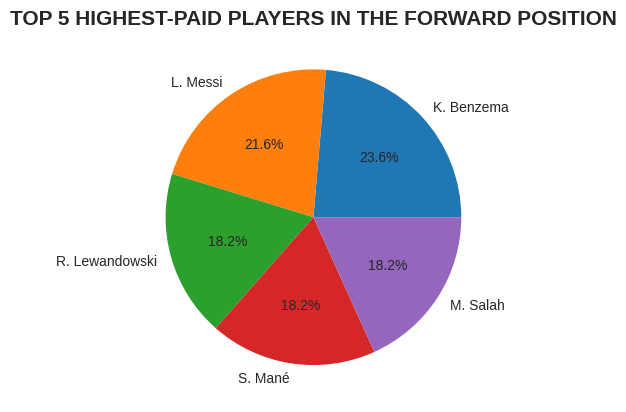

In [ ]:
# Define a list of forward positions
forward_positions = ['LF', 'RF', 'LS', 'RS', 'LW', 'RW', 'ST', 'CF']

# Filter the dataset to include only the forward positions
forward_players = fifa[fifa['club_position'].isin(forward_positions)]

# Sort the 'forward_players' dataframe by 'wage_eur'
forward_players = forward_players.sort_values(by='wage_eur', ascending=False)

# Create a pie chart of the top 10 highest-paid players in the 'forward_players' dataframe
top_10_wages = forward_players[:5]
plt.pie(top_10_wages['wage_eur'], labels=top_10_wages['short_name'], autopct='%1.1f%%')

# Set the title
plt.title('TOP 5 HIGHEST-PAID PLAYERS IN THE FORWARD POSITION', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Show the plot
plt.show()

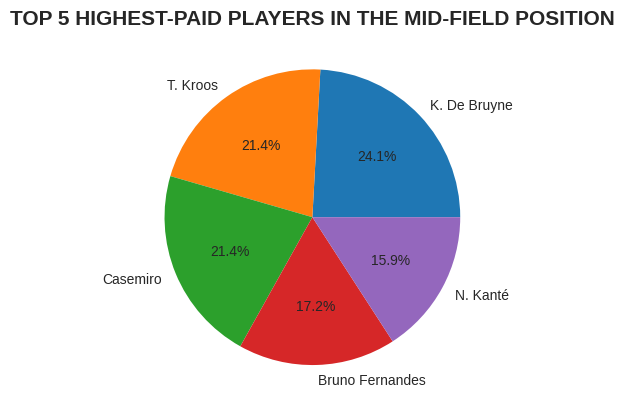

In [ ]:
# Define a list of forward positions
midfield_positions = ['RAM', 'LAM', 'CM', 'RM', 'LDM', 'LM', 'RDM', 'CAM', 'LCM', 'CDM', 'RCM']

# Filter the dataset to include only the forward positions
midfield_players = fifa[fifa['club_position'].isin(midfield_positions)]

# Sort the 'forward_players' dataframe by 'wage_eur'
midfield_players = midfield_players.sort_values(by='wage_eur', ascending=False)

# Create a pie chart of the top 10 highest-paid players in the 'forward_players' dataframe
top_10_wages = midfield_players[:5]
plt.pie(top_10_wages['wage_eur'], labels=top_10_wages['short_name'], autopct='%1.1f%%')

# Set the title
plt.title('TOP 5 HIGHEST-PAID PLAYERS IN THE MID-FIELD POSITION', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Show the plot
plt.show()

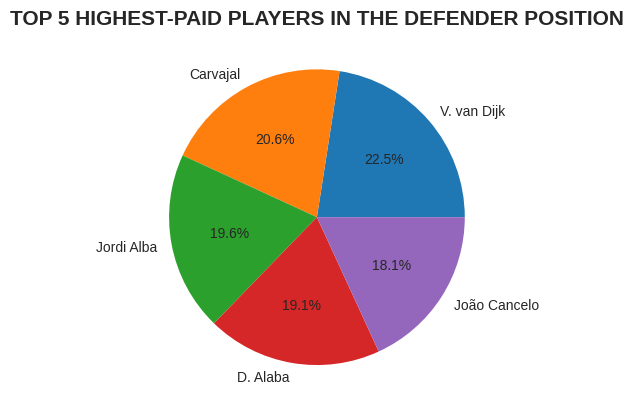

In [ ]:
# Define a list of forward positions
defense_positions = ['LWB', 'RWB', 'CB', 'RCB', 'LB', 'RB', 'LCB']

# Filter the dataset to include only the forward positions
defense_players = fifa[fifa['club_position'].isin(defense_positions)]

# Sort the 'forward_players' dataframe by 'wage_eur'
defense_players = defense_players.sort_values(by='wage_eur', ascending=False)

# Create a pie chart of the top 10 highest-paid players in the 'forward_players' dataframe
top_10_wages = defense_players[:5]
plt.pie(top_10_wages['wage_eur'], labels=top_10_wages['short_name'], autopct='%1.1f%%')

# Set the title
plt.title('TOP 5 HIGHEST-PAID PLAYERS IN THE DEFENDER POSITION', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Show the plot
plt.show()

In [ ]:
# Sort the DataFrame by player rating in descending order
fifa = fifa.sort_values(by='overall', ascending=False)

# Select the top 20 players
top_20_players = fifa.head(20)

# Group the top 20 players by club and count the number of players per club
players_per_club = top_20_players.groupby('club_name')['short_name'].count()

# Find the club with the highest number of players in the top 20 list
club_with_most_top_20_players = players_per_club.idxmax()

print(f'The club with the highest number of players in the top 20 list is {club_with_most_top_20_players}.')

The club with the highest number of players in the top 20 list is Liverpool.


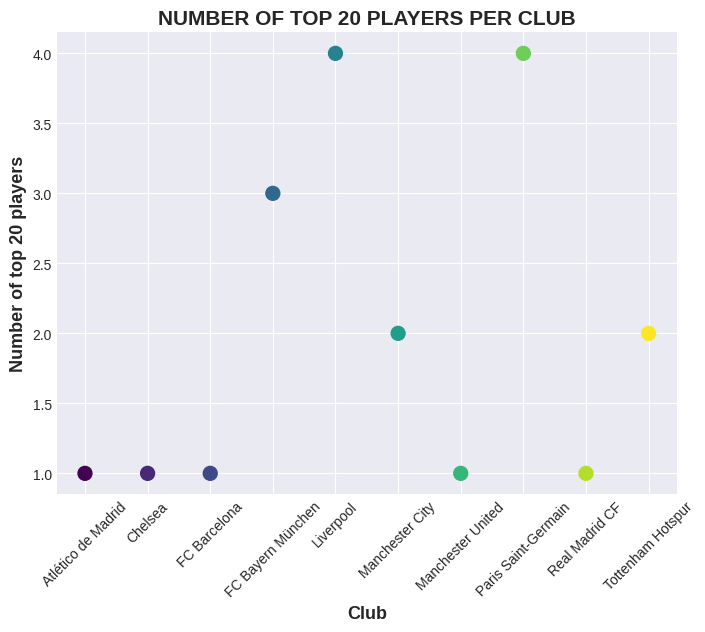

In [ ]:
# Create a list of colors for each club
color_list = np.arange(len(players_per_club))

# Create a scatter plot of the number of top 20 players in each club
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(players_per_club.index, players_per_club.values, s=100, c=color_list, cmap='viridis')
ax.set_xlabel('Club', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of top 20 players', fontsize=13, fontweight='bold')
ax.set_title('NUMBER OF TOP 20 PLAYERS PER CLUB', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

The correlation coefficient between age and overall rating is: 0.45945065326014034


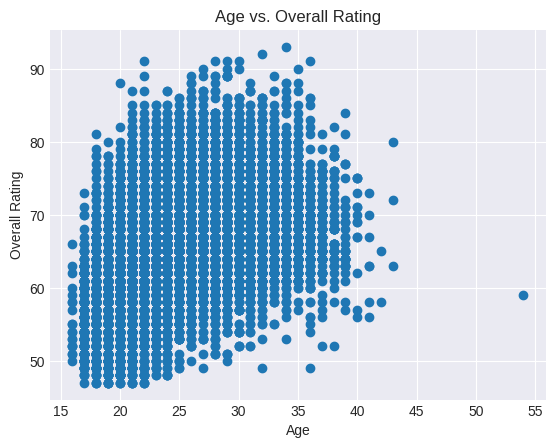

In [ ]:
# Create a scatter plot of age vs. overall rating
plt.scatter(fifa['age'], fifa['overall'])
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Age vs. Overall Rating')

# Calculate the correlation coefficient between age and overall rating
correlation_coefficient = fifa['age'].corr(fifa['overall'])

# Print the correlation coefficient
print(f"The correlation coefficient between age and overall rating is: {correlation_coefficient}")

In [ ]:
# Compute the minimum and maximum wages of players
min_wage = fifa["wage_eur"].min()
max_wage = fifa["wage_eur"].max()

# Print the results
print(f"Minimum wage: {min_wage}")
print(f"Maximum wage: {max_wage}")

Minimum wage: 500.0
Maximum wage: 350000.0


In [ ]:
# Compute the minimum and maximum ages of players
min_age = fifa["age"].min()
max_age = fifa["age"].max()

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 16
Maximum age: 54


In [ ]:
# Filter the dataset based on your criteria
dream_team = fifa[(fifa['age'] >= 16) & (fifa['age'] <= 25) & (fifa['wage_eur'] > 500)].sort_values('overall', ascending=False)

# Select the top 11 players based on overall rating
dream_team = dream_team.head(20)

# Calculate the total cost of wages for the dream team
total_wage_cost = dream_team['wage_eur'].sum()

# Print the total cost of wages
print(f"The total cost of wages for the dream team is {total_wage_cost} EUR per week.")

# Print the dream team
print(dream_team[['short_name', 'player_positions', 'overall', 'potential', 'wage_eur', 'age']])

The total cost of wages for the dream team is 2659000.0 EUR per week.
              short_name player_positions  overall  potential  wage_eur  age
6              K. Mbappé           ST, LW       91         95  230000.0   22
21         G. Donnarumma               GK       89         93  110000.0   22
29            E. Haaland               ST       88         93  110000.0   20
46            Rúben Dias               CB       87         91  170000.0   24
45             J. Sancho       RM, CF, LM       87         91  150000.0   21
44   T. Alexander-Arnold               RB       87         92  150000.0   22
43            F. de Jong      CM, CDM, CB       87         92  210000.0   24
64              K. Coman       LM, RM, LW       86         87  120000.0   25
67                 Rodri              CDM       86         89  175000.0   25
93           L. Martínez               ST       85         89  145000.0   23
95             A. Hakimi          RB, RWB       85         88  100000.0   22
94    

<ipython-input-38-8529cce0c53d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', num_bins)


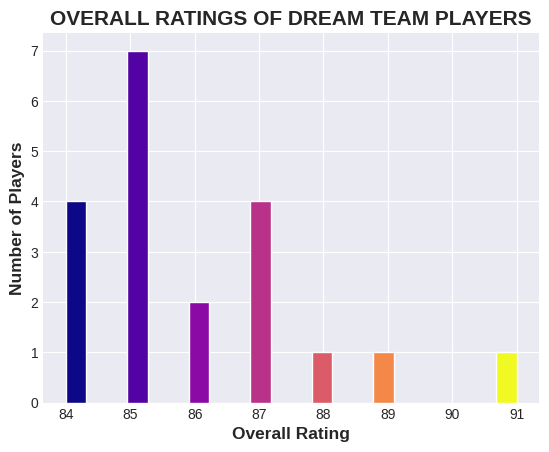

In [ ]:
# Define the number of bins and create a list of colors based on the number of bins
num_bins = 22
colors = plt.cm.get_cmap('plasma', num_bins)

# Create the histogram with different colors for each bin
n, bins, patches = plt.hist(dream_team['overall'], bins=num_bins, edgecolor='white')

for i in range(num_bins):
    patches[i].set_facecolor(colors(i))

# Add axis labels and a title to the chart
plt.xlabel('Overall Rating', fontsize=12.5, fontweight='bold')
plt.ylabel('Number of Players', fontsize=12.5, fontweight='bold')
plt.title('OVERALL RATINGS OF DREAM TEAM PLAYERS', fontsize=15, fontweight='bold')
plt.show()